In [1]:
from src.LatentSpace import LatentSpace
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import pandas as pd
import umap
import tqdm as notebook_tqdm
from sklearn.cluster import KMeans


/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
latent_space = LatentSpace(autoencoder_path='data/autoencoder_128dim_512f_tanh/',
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather'
                        )

Found 278326 files for Generator set


In [3]:
latent_space.load('data/latent_space_128dim_512f_tanh/')

In [4]:
latent_space.tracks

,id,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,...,track_id,track_name,track_preview_link,track_popularity,track_uri,artist_name,artist_id,artist_genres,artist_popularity,release_date
0,000DpcdeRxaoJKaLgpYXws,0.612810,1.135152,-0.668840,-0.625933,0.587785,-0.915550,-1.226668,-0.881540,-1.355680,...,000DpcdeRxaoJKaLgpYXws,Kärlek,https://p.scdn.co/mp3-preview/2c2517c3be174d43...,2,spotify:track:000DpcdeRxaoJKaLgpYXws,Nina Söderquist,4G6CNhvsf2XGfQsf7nioAv,"[europop, swedish melodic rock]",21,2016
1,000OMqK65Cse2zeUoomUfy,0.612810,0.439092,0.856117,1.030290,0.587785,1.289552,-1.234187,-0.881540,-0.733063,...,000OMqK65Cse2zeUoomUfy,Mi Yo Cabrón,https://p.scdn.co/mp3-preview/192c04d469c490bf...,47,spotify:track:000OMqK65Cse2zeUoomUfy,TéCanela,7DqUxnbDJwdpFRS8rIgVy0,[flamenco fusion],43,2017-12-15
2,000P80tkjRpk5aWNmyChqW,0.612810,1.148878,0.856196,1.844044,0.587785,-0.915550,0.943273,-0.881540,0.884331,...,000P80tkjRpk5aWNmyChqW,Broccoli Fuck - KIMMERCORE‘S RIMMERCORE PIEP F...,https://p.scdn.co/mp3-preview/6ad56b9e7b50d67b...,46,spotify:track:000P80tkjRpk5aWNmyChqW,Riot Shift,5J3RIw3YwgyXeosItjR9GY,"[rawstyle, uptempo hardcore, xtra raw]",44,2022-01-31
3,000QWvZpHrBIVrW4dGbaVI,0.602783,-1.028924,-0.145442,-0.625972,0.587785,-0.915090,0.943273,1.163178,0.881324,...,000QWvZpHrBIVrW4dGbaVI,General Error,https://p.scdn.co/mp3-preview/d739509a781f67a2...,29,spotify:track:000QWvZpHrBIVrW4dGbaVI,047,1Yf3fs3eLssRoT9T326j8i,[swedish synth],36,None
4,000WkK6rRXx9fRbrw3L7W8,0.612810,-1.029265,0.856196,0.702139,0.587785,1.286860,0.943272,-0.881540,-0.723363,...,000WkK6rRXx9fRbrw3L7W8,Hey Alli,https://p.scdn.co/mp3-preview/009da3eb8e55d15a...,17,spotify:track:000WkK6rRXx9fRbrw3L7W8,Runner Runner,2VLqBIUWKxrOVYVflf5pbW,"[alternative pop rock, neon pop punk]",27,2014-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278299,7zzMTPHYh2ntj2PLQyvrng,0.612810,1.142818,0.855613,1.844044,0.587785,-0.915550,-1.234191,-0.881540,0.884331,...,7zzMTPHYh2ntj2PLQyvrng,夜明けと蛍,https://p.scdn.co/mp3-preview/f9e23c5bb9255042...,47,spotify:track:7zzMTPHYh2ntj2PLQyvrng,n-buna,5DvySD4yjxyj8NvBWNfImP,[vocaloid],45,None
278300,7zzbfi8fvHe6hm342GcNYl,0.612810,1.148878,0.856196,1.842178,-1.064103,-0.878196,-1.233799,-0.881540,-0.779954,...,7zzbfi8fvHe6hm342GcNYl,Black-Throated Wind,https://p.scdn.co/mp3-preview/93ee803354a8fc01...,35,spotify:track:7zzbfi8fvHe6hm342GcNYl,Bob Weir,6YB0tbDGk01Q0P6wcHPjpC,"[blues rock, country rock, jam band, roots rock]",40,None
278301,7zzd7q2VoU8Dkgori4rgCc,0.612810,-1.029270,0.856196,-0.625972,0.587785,-0.901245,-0.569093,-0.881540,0.884331,...,7zzd7q2VoU8Dkgori4rgCc,Dia Bom,https://p.scdn.co/mp3-preview/fff31c24d18bcb78...,35,spotify:track:7zzd7q2VoU8Dkgori4rgCc,Tassia Reis,0kc1BjcLHaXhZVzCp0HeAl,"[afrofuturismo brasileiro, brazilian hip hop, ...",42,2021-07-01
278302,7zzfexN7EknTiRVQEwDRfs,-1.691837,1.148878,-1.362164,1.844044,-1.743334,0.188092,0.939313,1.163178,0.884331,...,7zzfexN7EknTiRVQEwDRfs,Never Look Back,https://p.scdn.co/mp3-preview/bdfc94eb0d327174...,25,spotify:track:7zzfexN7EknTiRVQEwDRfs,7and5,0PxqaZXFW167XSUiha9eEi,[new age],28,2006


In [5]:
latent_space.tracks[latent_space.tracks.artist_name.str.contains('King Khan')][['track_name','artist_name']]

,track_name,artist_name
316,I’ll Be Loving You,The King Khan & BBQ Show
7828,Invisible Girl,The King Khan & BBQ Show
16959,Old Gunga Din,King Khan
26474,Bite My Tongue,King Khan and the Shrines
74023,(How Can I Keep You) Outta Harms Way,King Khan and the Shrines
135235,Never Hold On,King Khan
138854,Born to Die,King Khan
165788,Born to Die,King Khan and the Shrines
184550,A Tree Not a Leaf Am I,King Khan
186657,Pray for Lil,King Khan and the Shrines


In [6]:
latent_space.get_similar_tracks_by_index(237075, similarity_measure='cosine')

,index,track_name,artist_name,track_uri,similarity
0,237075,Waddlin Around,The King Khan & BBQ Show,spotify:track:6dIIKPksrq46Z2lxpL7EpP,1.000000
1,124268,24 Frames,Jason Isbell,spotify:track:3TWffuE2fuzzl1qC2W2V6j,0.639344
2,113150,Reggaetón Lento (Bailemos),CNCO,spotify:track:3AEZUABDXNtecAOSC1qTfo,0.632712
3,117927,Blush,50 Foot Wave,spotify:track:3IbQZ5X5e1tsRUX90nETVN,0.601654
4,55774,Are You Really Gonna Show Up Tonight,Sarah and the Sundays,spotify:track:1Yu6NFfpcoXLMpcaDyTIAt,0.572306
5,43948,Outcome,Martin Courtney,spotify:track:1E7q8g6Ot16KQSFRsq099M,0.569514
6,29212,Time's Tight,The Embassy,spotify:track:0ooFG1JIvg6nnRfZrFREoZ,0.567468
7,235393,O Som,Maquinado,spotify:track:6aOKdBWyZuYksNtnBv3eOo,0.555149
8,152826,Botany Bay,Pyrates!,spotify:track:4HG6hAUcFOoFObGlWUTRSG,0.544166
9,180005,Cruel Lover,The Devil's Blood,spotify:track:52EsjmuscXK3ZmvrFxPru2,0.534701


In [7]:
data = latent_space.tracks[latent_space.latent_cols]

In [11]:
embedding = umap.UMAP(n_neighbors=50, min_dist=.5).fit_transform(data)

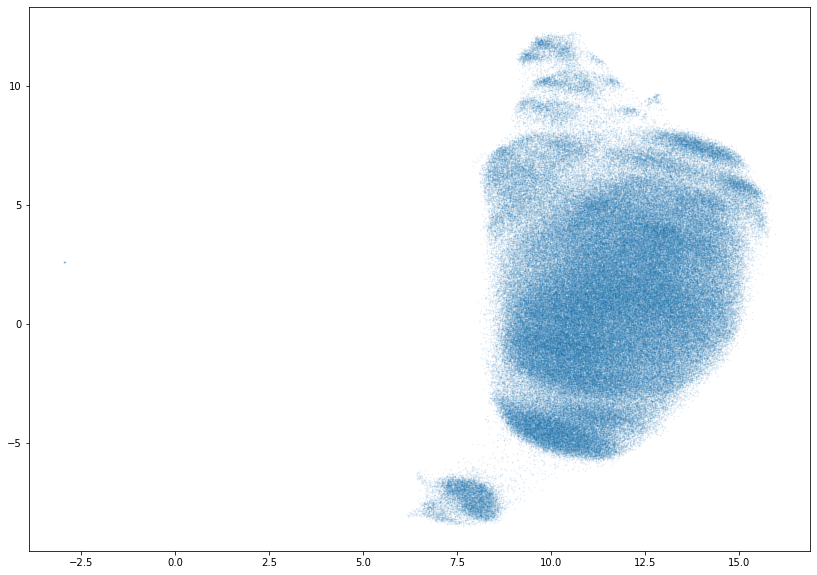

In [25]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, alpha=.1)

In [27]:
from sklearn.cluster import MiniBatchKMeans


kmeans = MiniBatchKMeans(n_clusters=13).fit(data)
predict = kmeans.predict(data)

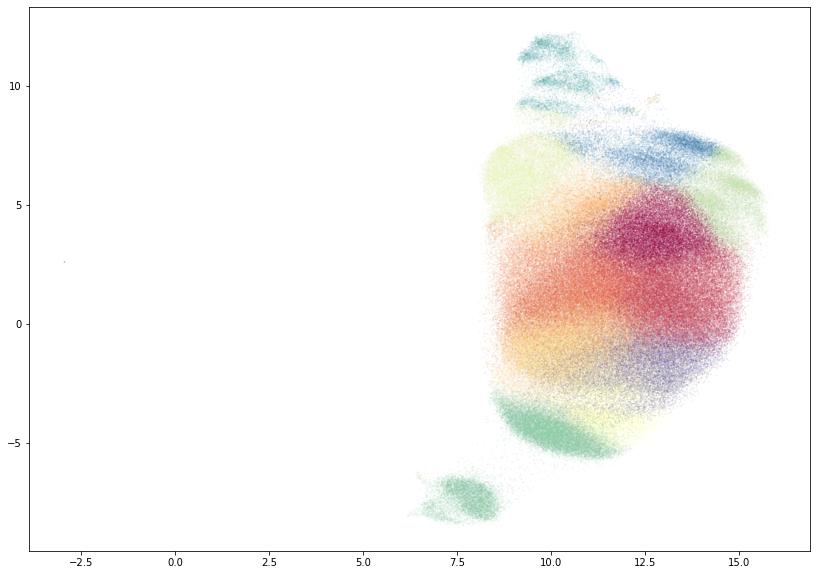

In [28]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, c=predict, cmap='Spectral', s=0.3, alpha=.1)

In [31]:
tracks = latent_space.tracks.copy()

In [32]:
tracks['predict'] = predict

In [46]:
gmm = GaussianMixture(n_components=13).fit(data)

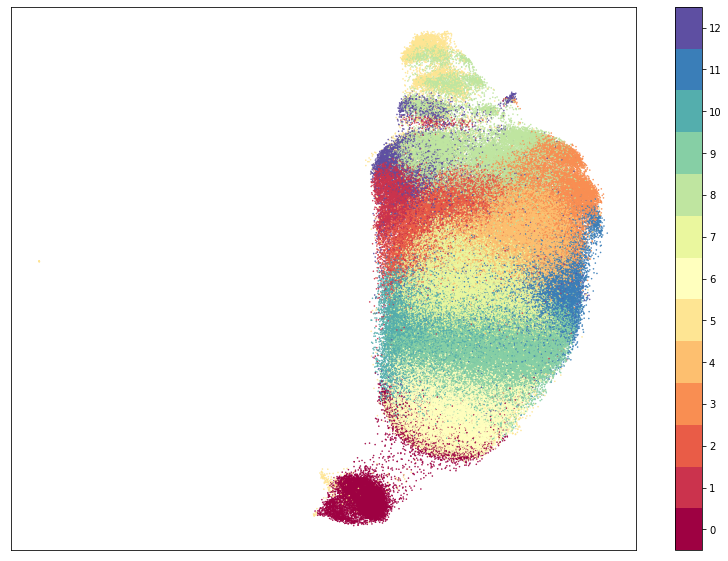

In [52]:
import numpy as np

gmm_predict = gmm.predict(data)
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, c=gmm_predict, cmap='Spectral', s=0.3, alpha=1)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(14)-0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(np.arange(13))

In [8]:
latent_test = LatentSpace(autoencoder_path='data/autoencoder_128dim_512f_tanh/',
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather',
                        sample_size=10000,
                        scale=False
                        )
latent_test.build()

Found 10000 files for Generator set
Getting predictions from autoencoder...
[============================================================>] 312 / 312

1.34 minutes elapsed
Building tracks dataframe...
size of results 39936
Track dataframe built. 0.06 minutes elapsed
Building artist distributions...
Artist distributions built. 0.0 minutes elapsed
Building genre distributions...
Genre distributions built. 0.04 minutes elapsed
Latent Space Built.


In [9]:
latent_test.tracks

,id,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,...,track_id,track_name,track_preview_link,track_popularity,track_uri,artist_name,artist_id,artist_genres,artist_popularity,release_date
0,0017A6SJgTbfQVU2EtsPNo,-0.260522,1.000000,0.999997,0.999915,0.999994,-0.999986,-1.000000,1.000000,1.000000,...,0017A6SJgTbfQVU2EtsPNo,Pangarap,https://p.scdn.co/mp3-preview/18e7343a05a1f68f...,42,spotify:track:0017A6SJgTbfQVU2EtsPNo,Barbie's Cradle,2cUM0BKXb6AP3CQAYK7xOw,"[opm, pinoy indie, pinoy rock]",35,2001-01-01
1,005O8mhCkdRry3f579g8RU,-0.989051,-0.436300,1.000000,0.690672,-1.000000,0.979254,-1.000000,1.000000,-0.952809,...,005O8mhCkdRry3f579g8RU,Sinun omasi,https://p.scdn.co/mp3-preview/195d2276e7d883cf...,1,spotify:track:005O8mhCkdRry3f579g8RU,Maria Lund,7BYHPolgF8aZKB57rhwgNX,[],8,2005
2,00Bc1ksconCAfnRGjCkU36,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.954706,-1.000000,1.000000,-0.871826,...,00Bc1ksconCAfnRGjCkU36,Godnatsangen - nu er dagen igen forbi,https://p.scdn.co/mp3-preview/2d642abaedd1b5e2...,16,spotify:track:00Bc1ksconCAfnRGjCkU36,Povl Kjøller,6k4D2evc9SDkkAIpSkExk9,"[bornesange, classic danish pop, danish pop rock]",28,1999
3,00KwJr7PMmVPh262QRMhrJ,0.544444,-0.915756,0.457306,0.557286,1.000000,-1.000000,0.999956,1.000000,-0.999914,...,00KwJr7PMmVPh262QRMhrJ,Strawberry Psycho,https://p.scdn.co/mp3-preview/6af37820c0b6e0ae...,30,spotify:track:00KwJr7PMmVPh262QRMhrJ,Kenta Dedachi,0kpcv0xdcnCWiCXr3htCwx,[japanese r&b],42,2022-07-27
4,00LsOY8JQazJif57WGX5Ir,0.999991,-0.999967,-1.000000,-1.000000,1.000000,0.788109,0.999713,0.999995,0.910982,...,00LsOY8JQazJif57WGX5Ir,She Ain't Dead Yet,https://p.scdn.co/mp3-preview/5f2e399acd3bd95e...,4,spotify:track:00LsOY8JQazJif57WGX5Ir,Isolated Beingz,2cVc3MFQCCpgYZuyehfPHe,[horrorcore],6,2022-06-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,7zkRI8hRco7Eae2ZFKUSrn,-0.996351,-1.000000,0.999981,1.000000,-1.000000,1.000000,-0.963378,-1.000000,1.000000,...,7zkRI8hRco7Eae2ZFKUSrn,Cavatina,https://p.scdn.co/mp3-preview/eb13c16eb8d08e5f...,26,spotify:track:7zkRI8hRco7Eae2ZFKUSrn,Norbert Kraft,50lWb5uxbtFDb7Dkh2BNVu,[classical guitar],30,1997-06-23
9980,7zn3pyBf1ECwewseMEZF7e,1.000000,0.999988,1.000000,0.820133,1.000000,-0.938138,1.000000,-1.000000,-1.000000,...,7zn3pyBf1ECwewseMEZF7e,KKNEL En La Tumba De Fidel,https://p.scdn.co/mp3-preview/5bebaa19828b7152...,30,spotify:track:7zn3pyBf1ECwewseMEZF7e,"Osmani Garcia ""La Voz""",37G8DfNgO4mQ3PKh5droSo,[cubaton],51,2022-07-07
9981,7zrddvfYcTacnpBuEJprRo,1.000000,-1.000000,0.927842,-1.000000,1.000000,-0.997706,0.999924,-1.000000,0.999989,...,7zrddvfYcTacnpBuEJprRo,"1816, The Year Without a Summer",https://p.scdn.co/mp3-preview/0971b3fab5010530...,29,spotify:track:7zrddvfYcTacnpBuEJprRo,Rasputina,4DeF1n7pWrs52PhWd2sEyr,"[bow pop, cello, dark cabaret, steampunk]",29,2007-06-26
9982,7zxiDfb4TNf6YugX3F9hcH,0.997930,1.000000,-1.000000,-0.925335,-1.000000,1.000000,0.999278,1.000000,0.357410,...,7zxiDfb4TNf6YugX3F9hcH,Red River Valley (Kids Version),https://p.scdn.co/mp3-preview/13aa58998d3270bd...,7,spotify:track:7zxiDfb4TNf6YugX3F9hcH,Kidz Now,3o46IjSjb7912SsuNsuE3k,[children's music],9,2010-06-29


In [10]:
latent_test.get_similar_tracks_by_index(2)

,index,track_name,artist_name,track_uri,similarity
0,2,Godnatsangen - nu er dagen igen forbi,Povl Kjøller,spotify:track:00Bc1ksconCAfnRGjCkU36,0.999999
1,4352,Boto Meu Povo Na Rua,Mart'nália,spotify:track:3NeIv5vFoKByUnjMjMQVEc,0.558978
2,3006,Bae - Original Mix,Jeff Samuel,spotify:track:2L5yhllWWvjrA76kM937kl,0.541999
3,889,THE SUN & THE SEA (feat. Donovan Woods),Donovan Woods,spotify:track:0gQEH2kiQT4d95wWfkzSJh,0.539337
4,7686,Sauvage,billy woods,spotify:track:60Cm4aPAWANgWW3H9eW5xq,0.531484
5,3628,Madison Moon,Dan Goldfus Project,spotify:track:2oXf0cQEAkJ6yNbLYu04Ka,0.524458
6,8973,What a Difference a Day Makes,Jade Baraldo,spotify:track:70BcWgK3z2rkUydYgivCnb,0.520726
7,8551,Painkillers,Rainbow Kitten Surprise,spotify:track:6fc51JZVE0Yijdi6RuoLFv,0.510520
8,8424,Tiny Little Love,Daddy Was a Milkman,spotify:track:6aoyBo3yQr11Dmj9a44UvP,0.498403
9,4175,Hazy Days,Crash Connection,spotify:track:3EqyaubNk1NfI7FcZ5eV0k,0.488863


<AxesSubplot:>

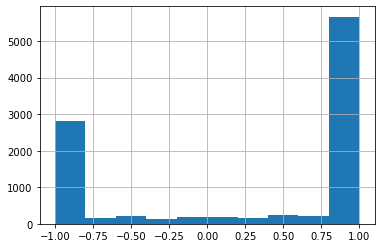

In [11]:
latent_test.tracks['latent_10'].hist()

2022-08-17 11:26:56.170058: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


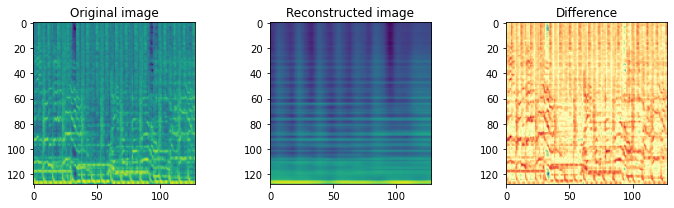

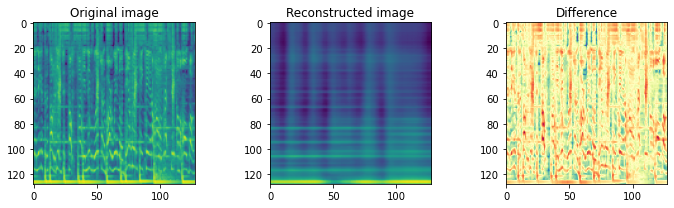

In [12]:
latent_test.plot_reconstruction(1)
latent_test.plot_reconstruction(4147)

In [13]:
latent_2 = LatentSpace(autoencoder_path='data/autoencoder_one_hundred_k_mel_128/',
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather',
                        )

Found 278326 files for Generator set


In [14]:
latent_2.load('data/latent_space_save')

In [18]:
latent_2.get_similar_tracks_by_index(316)

,index,track_name,artist_name,track_uri,similarity
0,316,I’ll Be Loving You,The King Khan & BBQ Show,spotify:track:00XrSeoUJusUuWvqd08lyF,1.000000
1,220836,Celtic Symphony,Charlie and the Bhoys,spotify:track:6AnkpS3xskLTlzARosHGAW,0.491282
2,161594,Balla Balla,Zeltinger Band,spotify:track:4WD5hRAptpN93IQs30rSrZ,0.468448
3,120762,Romance,Hajime Mizoguchi,spotify:track:3NUAGOhZ5xOqSg5K1ctQca,0.465235
4,89360,Belarus - Original Mix,SPURI,spotify:track:2Uy0eAZWL79JI6WAQ8hCua,0.464453
5,94856,You Got Me,Wh0,spotify:track:2eZGW2Zqv8W0jjRZ3mGB01,0.460630
6,223882,Pûşper,Aaron Martin,spotify:track:6GFzkoWSx8afoekKHtNkDd,0.454463
7,151381,Cien Por Uno - Live Version,El Compa Chuy,spotify:track:4ElugW1dRJMJkX0VuEHKsy,0.450256
8,232719,Remember Me When You Sing,Stick and Poke,spotify:track:6Vis9DMy0vAZZAbYlMXPHw,0.447330
9,253358,Titanium,Mike Dawes,spotify:track:75oliAy7vFzfoDKYBrCCDa,0.435335


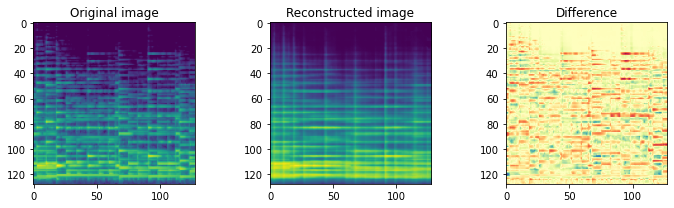

In [19]:
latent_2.plot_reconstruction(316)

In [20]:
latent_2 = LatentSpace(autoencoder_path='data/autoencoder_128dim_Conv1d_1/',
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather',
                        )

Found 278326 files for Generator set


In [21]:
latent_2.build()
latent_2.save('data/latent_128dim_Conv1d_1')

Getting predictions from autoencoder...
[============================================================>] 8697 / 8697

24.68 minutes elapsed
Building tracks dataframe...
size of results 1113216
Track dataframe built. 20.42 minutes elapsed
Building artist distributions...
Artist distributions built. 0.01 minutes elapsed
Building genre distributions...
Genre distributions built. 3.16 minutes elapsed
Latent Space Built.


In [50]:
latent_2.tracks[latent_2.tracks.artist_name.str.contains('Otis Redding')][['track_uri','track_name','artist_name']]

,track_uri,track_name,artist_name
110794,spotify:track:36AlMHDBFwSsD3FQOy1R81,Try a Little Tenderness,Otis Redding
142393,spotify:track:3zBhihYUHBmGd2bcQIobrF,(Sittin' On) the Dock of the Bay,Otis Redding
157448,spotify:track:4PFiLGx8jAzcAJxwPLUeZ9,Cigarettes and Coffee,Otis Redding
174549,spotify:track:4skknrc3sJqaPTtUr2cwFq,These Arms of Mine,Otis Redding


In [51]:
seed = 142393

display(latent_2.get_similar_tracks_by_index(seed))
display(latent_2.get_similar_artists_by_index(seed))
display(latent_2.get_similar_genres_by_index(seed))

,index,track_name,artist_name,track_uri,similarity
0,142393,(Sittin' On) the Dock of the Bay,Otis Redding,spotify:track:3zBhihYUHBmGd2bcQIobrF,1.000000
1,58234,Beautiful Girl,William Fitzsimmons,spotify:track:1d42wCFvKPTZDCa82EYkoA,0.787954
2,28139,Quand le soleil entre dans ma maison,Pierre Perret,spotify:track:0mw1IiyQhXKrNgOjRH425e,0.774587
3,231312,Tief unten im Meer,Alex Schmeisser,spotify:track:6TGeJ8wfS65bsop0XmRfDQ,0.769997
4,254770,The Ballad of Little Blackie,David Knopfler,spotify:track:78GKXasulSsOhvTIdBb3Y9,0.758471
5,226447,Ladies Of the Canyon (Bonus),Chris Potter,spotify:track:6KjMkGCoRpcb9nHS2auXo5,0.752502
6,178188,Brutally,Suki Waterhouse,spotify:track:4z6qtN4iZ7MPVZYCtiSgsM,0.751242
7,181667,Sniglar och krut,Ulf Lundell,spotify:track:557j505ghMzRTsCDifKeHG,0.750326
8,98203,Tractor Pull,Preston Reed,spotify:track:2kLgJT5glZdjnkjKpRC2Y8,0.748920
9,243178,Paint the Town Beige,Walt Wilkins,spotify:track:6nmP7CvT9ZRDq4r0gmZltY,0.746441


,artist_name,similarity
0,Chris Potter,0.762869
1,Renegade Stringband,0.762207
2,Alex Izenberg,0.756389
3,Hyppo Pothus,0.752009
4,"Slovak Sinfonietta, Zilina",0.745408
5,Klaus Lage,0.742345
6,Ruben Romero,0.742265
7,Warren Zevon,0.735077
8,Isobel Campbell,0.732570
9,Kenji Endou,0.728145


,genre,similarity
0,chanson,0.755949
1,techno kayo,0.721215
2,british children's music,0.706677
3,experimental big band,0.702784
4,new orleans americana,0.685945
5,wisconsin indie,0.675433
6,classic iskelma,0.671919
7,brazilian blues,0.670089
8,baltimore indie,0.669145
9,korean electropop,0.668703
